<a href="https://colab.research.google.com/github/PikoAll/machine-learning-e-deep-learning/blob/main/K_Fold_Pipeline_ridurreOverfittingMatrixConfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pipeline combinazione di standardizazzione e modello preditivo.....
#K-fold
#grafici per vedere se c'e overfitting o underfitting e come risolvere

#ricerca automatizzata per gli iperparametri migliori
#matrice di confusione

Uso del dataset di informazioni relative al tumore se e Benignio o Maligno

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


poichè abbiamo B=benignio ed M=maligno dobbiamo farli diventare 0 e 1 

In [ ]:
from sklearn.preprocessing import LabelEncoder
X=df.loc[:,2:].values
y=df.loc[:,1].values

le=LabelEncoder()
y=le.fit_transform(y)
print('Da:',le.classes_)
print('A:',le.transform(['M','B']))

Da: ['B' 'M']
A: [1 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=1)

Ora creiamo una pipeline che è un insieme di:
standerdizzazione, regressione logistica, PCA una tecnica che comprime tutte le 30 colonne di attributi

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipeLr=make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(random_state=1,solver='lbfgs'))  #con PCA le 30 colonne diventano 2

pipeLr.fit(X_train,y_train)

print('Accuratezza:',pipeLr.score(X_test,y_test))

Accuratezza: 0.956140350877193


K-fold                                                                           
Un ulteriore tecnica utile e quella di creare dati di adestramento, di convalida,e di test
se si usa una kfold su una rete neurale e meglio che ad ogni iterazione la rete viene ricreata cancellando le informazioni che aveva non solo con la rete ma con tutti i modelli (in questo caso non la stiamo facendo

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=10).split(X_train,y_train)

scores=[]
for k,(train,test) in enumerate(kfold):
  pipeLr.fit(X_train[train],y_train[train])
  score=pipeLr.score(X_train[test],y_train[test])
  scores.append(score)

  print('K=',k+1,' Accuratezza=',score)

print('\nMedia acuratezza',np.mean(scores))


K= 1  Accuratezza= 0.9347826086956522
K= 2  Accuratezza= 0.9347826086956522
K= 3  Accuratezza= 0.9565217391304348
K= 4  Accuratezza= 0.9565217391304348
K= 5  Accuratezza= 0.9347826086956522
K= 6  Accuratezza= 0.9555555555555556
K= 7  Accuratezza= 0.9777777777777777
K= 8  Accuratezza= 0.9333333333333333
K= 9  Accuratezza= 0.9555555555555556
K= 10  Accuratezza= 0.9555555555555556

Media acuratezza 0.9495169082125603


#Un modo migliore per scrivere la K-fold e:

In [ ]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(estimator=pipeLr,X=X_train,y=y_train, cv=10,n_jobs=1) #cv indica il numero dei fold estimator passiamo il nostro modello, se in n_job avreimesso -1 avrei distibuito tutti i core in parallelo
print('Accuratezza per fold:',scores)
print('Acuratezza media',np.mean(scores))

Accuratezza per fold: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
Acuratezza media 0.9495169082125603


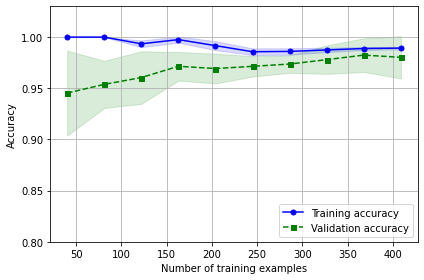

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

#ricerca automatizzata per gli iperparametri migliori
tramite la griglia di ricerca

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipeSVC=make_pipeline(StandardScaler(),SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipeSVC, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


ora mi salvo il modello migliore e lo provo sui dati di test

In [ ]:
best=gs.best_estimator_
best.fit(X_train,y_train)
print('Acuratezza:',best.score(X_test,y_test))

Acuratezza: 0.9736842105263158


Matrice di confusione

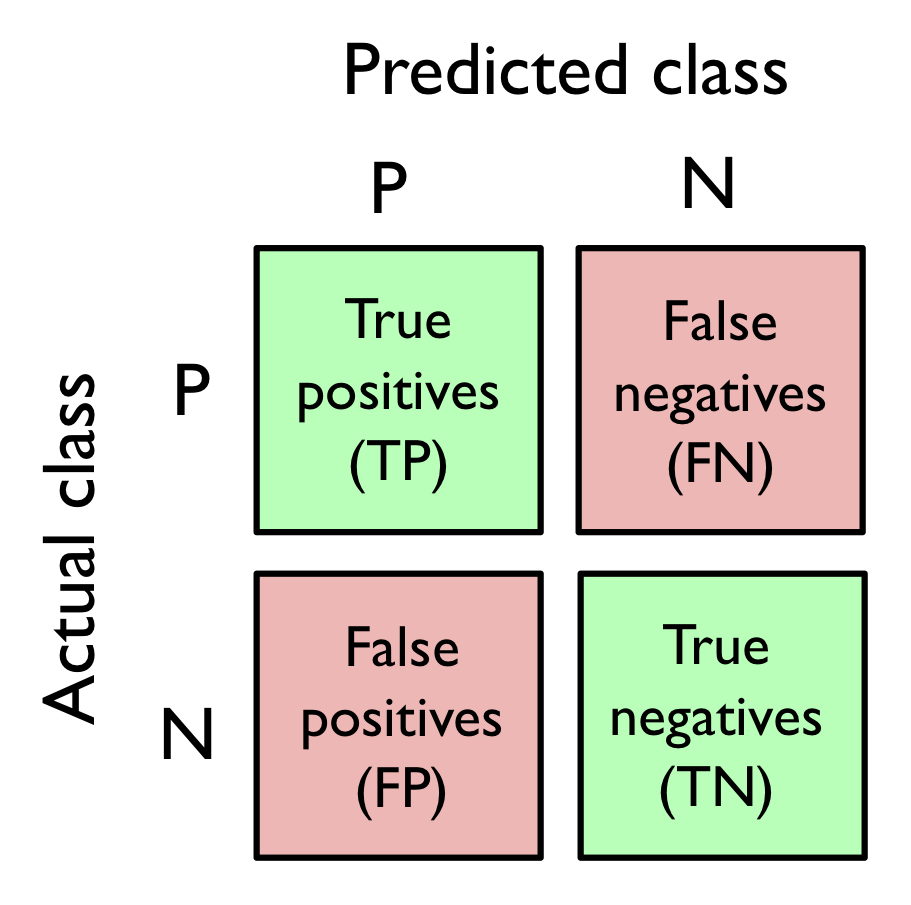

In [ ]:
from sklearn.metrics import confusion_matrix

pipeSVC.fit(X_train, y_train)
y_pred = pipeSVC.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


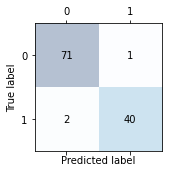

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()